In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('3campain.csv')
data

,Campain,Sell
0,A,12.6
1,A,12.0
2,A,11.8
3,A,11.9
4,A,13.0
5,A,12.5
6,A,14.0
7,B,10.0
8,B,10.2
9,B,10.0


In [3]:
data['Sell'].mean()

11.980952380952381

In [4]:
data.groupby('Campain').mean()

,Sell
Campain,
A,12.542857
B,11.533333
C,11.825000


In [5]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [6]:
result = ols('Sell ~ Campain', data=data).fit()

In [7]:
table = sm.stats.anova_lm(result)

In [8]:
table

,df,sum_sq,mean_sq,F,PR(>F)
Campain,2.0,3.606905,1.803452,0.821297,0.455683
Residual,18.0,39.525476,2.195860,NaN,NaN


In [9]:
mean = data['Sell'].mean()

In [10]:
data['Mean'] = data['Sell'].mean()

In [11]:
data

,Campain,Sell,Mean
0,A,12.6,11.980952
1,A,12.0,11.980952
2,A,11.8,11.980952
3,A,11.9,11.980952
4,A,13.0,11.980952
5,A,12.5,11.980952
6,A,14.0,11.980952
7,B,10.0,11.980952
8,B,10.2,11.980952
9,B,10.0,11.980952


In [12]:
sum_sq = sum((data['Sell'] - data['Mean'])**2)
sum_sq

43.132380952380956

In [13]:
gMean = data.groupby('Campain').mean()[['Sell']]
gMean

,Sell
Campain,
A,12.542857
B,11.533333
C,11.825000


In [14]:
gMean = gMean.rename(columns={'Sell': 'gMean'})
gMean

,gMean
Campain,
A,12.542857
B,11.533333
C,11.825000


In [15]:
data = data.merge(gMean, left_on='Campain', right_index=True)
data

,Campain,Sell,Mean,gMean
0,A,12.6,11.980952,12.542857
1,A,12.0,11.980952,12.542857
2,A,11.8,11.980952,12.542857
3,A,11.9,11.980952,12.542857
4,A,13.0,11.980952,12.542857
5,A,12.5,11.980952,12.542857
6,A,14.0,11.980952,12.542857
7,B,10.0,11.980952,11.533333
8,B,10.2,11.980952,11.533333
9,B,10.0,11.980952,11.533333


In [16]:
ss_r = sum((data['Sell'] - data['gMean'])**2)
ss_r

39.52547619047619

In [18]:
ss_e = sum((data['Mean'] - data['gMean'])**2)
ss_e

3.6069047619047776

In [19]:
ms_e = ss_e / 2
ms_e

1.8034523809523888

In [20]:
ms_r = ss_r / 18
ms_r

2.1958597883597886

In [39]:
f = ms_e / ms_r
f

0.8212966923081592

In [34]:
import scipy.stats as st

In [42]:
p = 1 - st.f.cdf(f, 2, 18)
p

0.4556832940515221

In [28]:
from scipy.stats import f
import matplotlib.pyplot as plt

In [32]:
d = f.rvs(2, 18, size=10000)

(array([1.416e+03, 1.223e+03, 1.025e+03, 8.630e+02, 7.420e+02, 6.510e+02,
        5.260e+02, 4.480e+02, 3.790e+02, 3.600e+02, 3.290e+02, 2.600e+02,
        2.070e+02, 1.880e+02, 1.840e+02, 1.580e+02, 1.210e+02, 9.200e+01,
        8.400e+01, 8.200e+01, 7.400e+01, 7.100e+01, 5.100e+01, 6.500e+01,
        5.200e+01, 2.600e+01, 2.200e+01, 3.700e+01, 1.800e+01, 2.100e+01,
        2.000e+01, 1.500e+01, 1.900e+01, 1.400e+01, 1.300e+01, 9.000e+00,
        1.600e+01, 1.300e+01, 7.000e+00, 7.000e+00, 8.000e+00, 8.000e+00,
        4.000e+00, 3.000e+00, 5.000e+00, 4.000e+00, 3.000e+00, 3.000e+00,
        3.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 3.000e+00,
        4.000e+00, 7.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+0

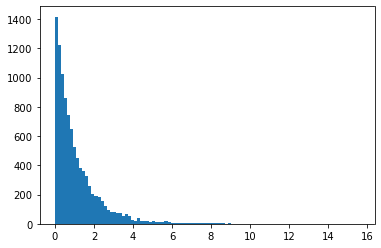

In [33]:
plt.hist(d, bins=100)